In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [4]:
import matplotlib.cm as cm
import math
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl, 
                    edgecolor='black')

In [94]:
pit = pd.read_excel('https://github.com/siestageek/datasets/blob/master/xlsx/df_pit_2(%EC%88%98%EC%A0%95).xlsx?raw=true')

In [95]:
pit = pit.sort_values('player_W', ascending=False)[:95]

In [65]:
pit.sort_values('player_W', ascending=False)[:45].mvp.value_counts()

0    36
1     9
Name: mvp, dtype: int64

In [96]:
data = pit.loc[:, ['player_W','player_WPCT']].to_numpy()    # 'player_ERA'
target = pit.loc[:, 'mvp']

print("종속변수 값 비율\n", target.value_counts())

# 데이터 분할
x_train, x_test, y_train, y_test = \
    train_test_split(data, target, test_size=0.3,
            random_state=2010061100, stratify=target)
    

종속변수 값 비율
 0    86
1     9
Name: mvp, dtype: int64


훈련 정확도 0.9090909090909091
예측정확도 0.896551724137931
[[26  0]
 [ 3  0]]
정밀도 1.0
재현율 0.896551724137931


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


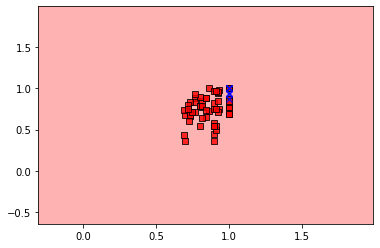

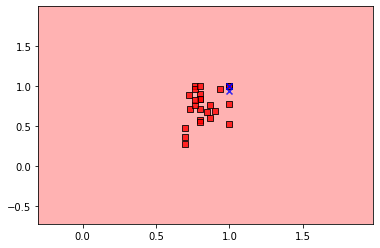

In [97]:
# 로지스틱 회귀

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

print('훈련 정확도', lr.score(x_train, y_train))

pred = lr.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, lr)
plt.show()

plot_decision_regions(x_test, y_test, lr)
plt.show()

In [98]:
lr = LogisticRegression()
lr.fit(data, target)

print('훈련 정확도', lr.score(data, target))

print(confusion_matrix(target, lr.predict(data)))


훈련 정확도 0.9052631578947369
[[86  0]
 [ 9  0]]


훈련 정확도 0.9545454545454546
예측정확도 0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


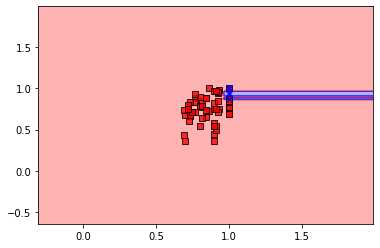

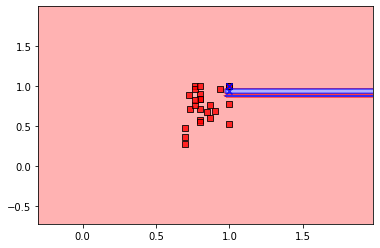

In [99]:
# 의사결정나무

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print('훈련 정확도', dt.score(x_train, y_train))

pred = dt.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, dt)
plt.show()

plot_decision_regions(x_test, y_test, dt)
plt.show()

In [100]:
dt = DecisionTreeClassifier()
dt.fit(data, target)

print('훈련 정확도', dt.score(data, target))

print(confusion_matrix(target, lr.predict(data)))

훈련 정확도 0.9473684210526315
[[86  0]
 [ 9  0]]


훈련 정확도 0.9090909090909091
예측정확도 0.896551724137931
[[26  0]
 [ 3  0]]
정밀도 1.0
재현율 0.896551724137931


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


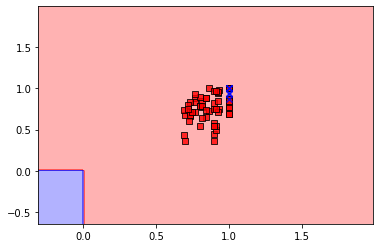

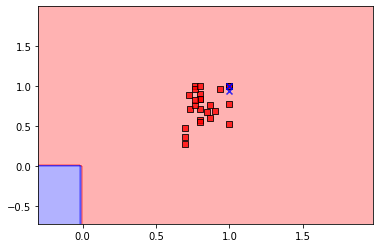

In [101]:
# 나이브 베이즈

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

bayes = BernoulliNB()
bayes.fit(x_train, y_train)
print('훈련 정확도', bayes.score(x_train, y_train))

pred = bayes.predict(x_test)

# 모델 평가
print('예측정확도', accuracy_score(pred, y_test))
print(confusion_matrix(y_test, pred))
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, bayes)
plt.show()

plot_decision_regions(x_test, y_test, bayes)
plt.show()

In [102]:
bayes = BernoulliNB()
bayes.fit(data, target)
print('훈련 정확도', bayes.score(data, target))

# 모델 평가
print(confusion_matrix(target, bayes.predict(data)))

훈련 정확도 0.9052631578947369
[[86  0]
 [ 9  0]]


훈련정확도 0.9393939393939394
예측정확도 0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


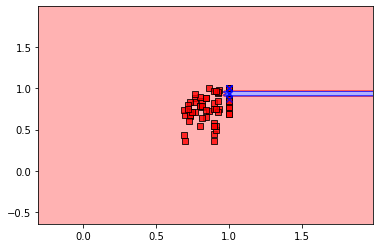

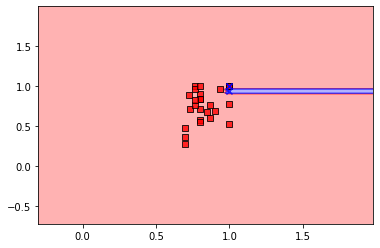

In [123]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# knn 분석 : k=4
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

pred = knn.predict(x_test)

print('훈련정확도', knn.score(x_train, y_train))
print('예측정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, knn)
plt.show()

plot_decision_regions(x_test, y_test, knn)
plt.show()

In [124]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, target)

print('훈련정확도', knn.score(data, target))

print(confusion_matrix(target, knn.predict(data)))

훈련정확도 0.9578947368421052
[[86  0]
 [ 4  5]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The l

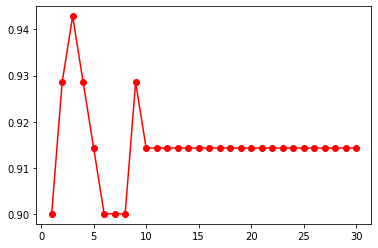

In [105]:
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train,
                            cv=10, scoring='accuracy')
    scores.append(score.mean())

# 교차검증 시각화
x = range(1,31)
plt.plot(x, scores, 'ro-')
plt.show()    

훈련 정확도 0.9545454545454546
예측 정확도 0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


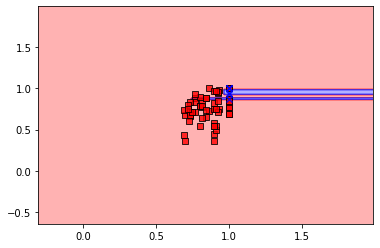

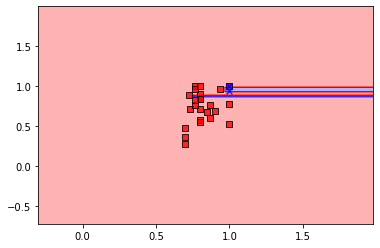

In [106]:
# 부스팅 계열

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')

adaclf.fit(x_train, y_train)
print('훈련 정확도', adaclf.score(x_train, y_train))

pred = adaclf.predict(x_test)
print('예측 정확도', accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, adaclf)
plt.show()

plot_decision_regions(x_test, y_test, adaclf)
plt.show()

In [107]:
adaclf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=3),
            n_estimators=100, learning_rate=0.5,
            algorithm='SAMME.R')
adaclf.fit(data, target)

print('훈련정확도', adaclf.score(data, target))

print(confusion_matrix(target, adaclf.predict(data)))

훈련정확도 0.9473684210526315
[[86  0]
 [ 5  4]]


0.9545454545454546
0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


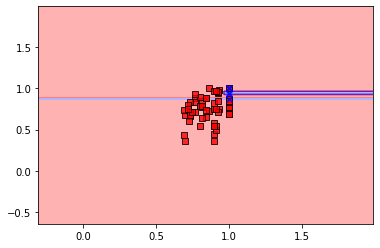

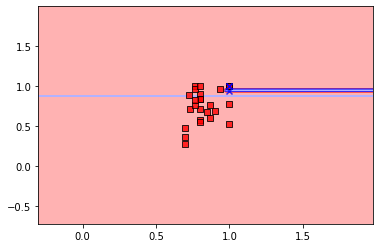

In [108]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)

# 훈련 및 평가, 결정경계 시각화
gbclf.fit(x_train, y_train)
print(gbclf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = gbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, gbclf)
plt.show()

plot_decision_regions(x_test, y_test, gbclf)
plt.show()

In [109]:
gbclf = GradientBoostingClassifier(
    n_estimators=100, max_depth=3,
    random_state=2001311200)
gbclf.fit(data, target)

print('훈련정확도', gbclf.score(data, target))

print(confusion_matrix(target, gbclf.predict(data)))

훈련정확도 0.9473684210526315
[[86  0]
 [ 5  4]]


0.9545454545454546
0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


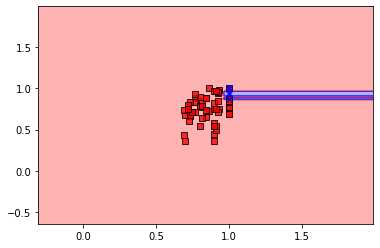

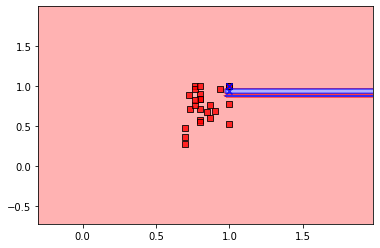

In [110]:
rfcf = RandomForestClassifier()

# 훈련 및 평가, 결정경계 시각화
rfcf.fit(x_train, y_train)
print(rfcf.score(x_train, y_train))

# 예측 및 평가, 결정경계 시각화
pred = rfcf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, rfcf)
plt.show()

plot_decision_regions(x_test, y_test, rfcf)
plt.show()


In [111]:
rfcf = RandomForestClassifier()
rfcf.fit(data, target)

print('훈련정확도', rfcf.score(data, target))

print(confusion_matrix(target, rfcf.predict(data)))

훈련정확도 0.9473684210526315
[[86  0]
 [ 5  4]]


0.9393939393939394
0.9310344827586207
[[26  0]
 [ 2  1]]
정밀도 0.9770114942528735
재현율 0.9310344827586207


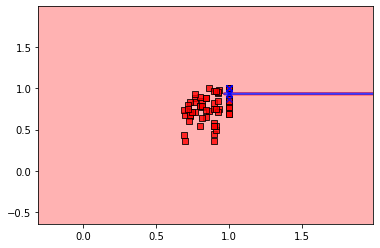

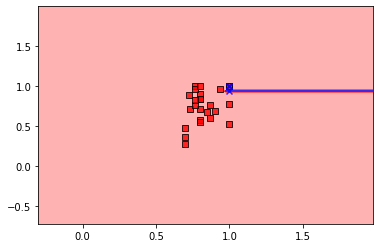

In [112]:
from xgboost import XGBClassifier

xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(x_train, y_train)
print(xgbclf.score(x_train, y_train))

pred = xgbclf.predict(x_test)
print(accuracy_score(pred, y_test))

print(confusion_matrix(y_test, pred))

print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, xgbclf)
plt.show()

plot_decision_regions(x_test, y_test, xgbclf)
plt.show()

In [113]:
xgbclf = XGBClassifier(n_estimators=500,
                       learning_rate=0.1, max_depth=3)
xgbclf.fit(data, target)

print('훈련정확도', xgbclf.score(data, target))

print(confusion_matrix(target, xgbclf.predict(data)))

훈련정확도 0.9368421052631579
[[86  0]
 [ 6  3]]


In [127]:
# SVM 분석

from sklearn.svm import SVC

svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(x_train, y_train)
pred = svcl.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svcl.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.9090909090909091
예측 정확도 0.896551724137931


array([[23,  3],
       [ 0,  3]], dtype=int64)

정밀도 0.9084880636604775
재현율 0.896551724137931


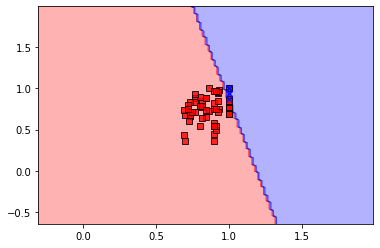

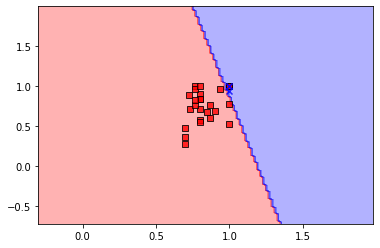

In [128]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcl)
plt.show()

plot_decision_regions(x_test, y_test, svcl)
plt.show()

In [116]:
svcl = SVC(kernel='linear', C=1E10, random_state=0)
svcl.fit(data, target)

print('훈련정확도', svcl.score(data, target))

print(confusion_matrix(target, svcl.predict(data)))

훈련정확도 0.9052631578947369
[[77  9]
 [ 0  9]]


In [126]:
svcrb = SVC(kernel='rbf', C=1E10, random_state=0)
svcrb.fit(x_train, y_train)
pred = svcrb.predict(x_test)

# 분석결과 평가
print('훈련 정확도', svcrb.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)

훈련 정확도 0.9393939393939394
예측 정확도 0.9310344827586207


array([[26,  0],
       [ 2,  1]], dtype=int64)

정밀도 0.9770114942528735
재현율 0.9310344827586207


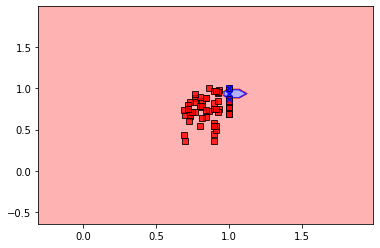

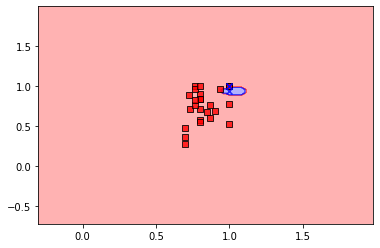

In [118]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, svcrb)
plt.show()

plot_decision_regions(x_test, y_test, svcrb)
plt.show()

In [125]:
svcrb = SVC(kernel='rbf', C=1E10, random_state=0)
svcrb.fit(data, target)

print('훈련정확도', svcrb.score(data, target))

print(confusion_matrix(target, svcrb.predict(data)))

훈련정확도 0.9157894736842105
[[79  7]
 [ 1  8]]


In [120]:
# 신경망

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[15, 50])
# mlp = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=[50])
mlp.fit(x_train, y_train)

pred = mlp.predict(x_test)

# 분석결과 평가
print('훈련 정확도', mlp.score(x_train, y_train))
print('예측 정확도', accuracy_score(y_test, pred))

confusion_matrix(y_test, pred)


훈련 정확도 0.8939393939393939
예측 정확도 0.8620689655172413


array([[23,  3],
       [ 1,  2]], dtype=int64)

정밀도 0.8470380194518125
재현율 0.8620689655172413


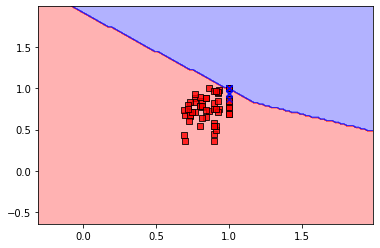

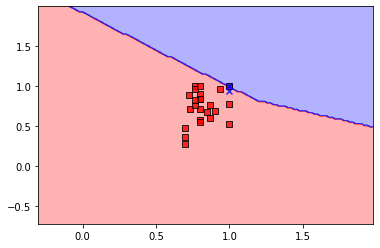

In [121]:
print('정밀도', precision_score(pred, y_test, average='weighted'))
print('재현율', recall_score(pred, y_test, average='weighted'))

plot_decision_regions(x_train, y_train, mlp)
plt.show()

plot_decision_regions(x_test, y_test, mlp)
plt.show()

훈련정확도 0.9368421052631579
[[86  0]
 [ 6  3]]


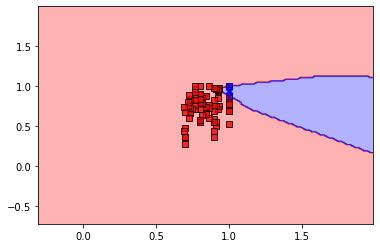

In [122]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[5,10])
mlp.fit(data, target)

print('훈련정확도', mlp.score(data, target))

print(confusion_matrix(target, mlp.predict(data)))

plot_decision_regions(data, target, mlp)
plt.show()